#Miniprojeto AD

##Grupo
- Camila Vieira
- José Vinicius

##Importações e Downloads

In [ ]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, f1_score

##Preparação dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab/ArvoreDecisao/

/content/drive/MyDrive/Colab/ArvoreDecisao


In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
len(np.unique(df["PassengerId"])), len(np.unique(df["Name"])), len(np.unique(df["Ticket"])), len(np.unique(df["Cabin"].dropna()))

(891, 891, 681, 147)

In [ ]:
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)

In [ ]:
df_cabin = df['Cabin']

mapeamento = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

def mapear_para_inteiro(valor):
  if isinstance(valor, str) and len(valor) > 0:
    char = valor[0]
    return mapeamento.get(char, 0)
  else:
    return 0

df_cabin = df_cabin.apply(mapear_para_inteiro)

df['Cabin'] = df_cabin
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,3,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,3,S
4,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,S
887,1,1,female,19.0,0,0,30.0000,2,S
888,0,3,female,NaN,1,2,23.4500,0,S
889,1,1,male,26.0,0,0,30.0000,3,C


In [ ]:
df['Sex'] = df['Sex'].map({"male": 0, "female": 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

In [ ]:
df_age = df['Age']


def mapear_para_faixa_etaria(idade):
    if idade < 8:
        return 1
    elif 8 <= idade <= 16:
        return 2
    elif 16 <= idade <= 24:
        return 3
    elif 24 <= idade <= 32:
        return 4
    elif 32 <= idade <= 40:
        return 5
    elif 40 <= idade <= 48:
        return 6
    elif 48 <= idade <= 56:
        return 7
    elif 56 <= idade <= 64:
        return 8
    elif 64 <= idade <= 72:
        return 9
    else:
        return 0

df_age = df_age.apply(mapear_para_faixa_etaria)

df_age

0      3
1      5
2      4
3      5
4      5
      ..
886    4
887    3
888    0
889    4
890    4
Name: Age, Length: 891, dtype: int64

In [ ]:
df["Age"].fillna(0, inplace=True)

mean_embarked = df["Embarked"].mean()
df["Embarked"].fillna(mean_embarked, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##Divisão do Dataset

In [ ]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']
X, y

(     Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
 0         3    0  22.0      1      0   7.2500      0       0.0
 1         1    1  38.0      1      0  71.2833      3       2.0
 2         3    1  26.0      0      0   7.9250      0       0.0
 3         1    1  35.0      1      0  53.1000      3       0.0
 4         3    0  35.0      0      0   8.0500      0       0.0
 ..      ...  ...   ...    ...    ...      ...    ...       ...
 886       2    0  27.0      0      0  13.0000      0       0.0
 887       1    1  19.0      0      0  30.0000      2       0.0
 888       3    1   0.0      1      2  23.4500      0       0.0
 889       1    0  26.0      0      0  30.0000      3       2.0
 890       3    0  32.0      0      0   7.7500      0       1.0
 
 [891 rows x 8 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

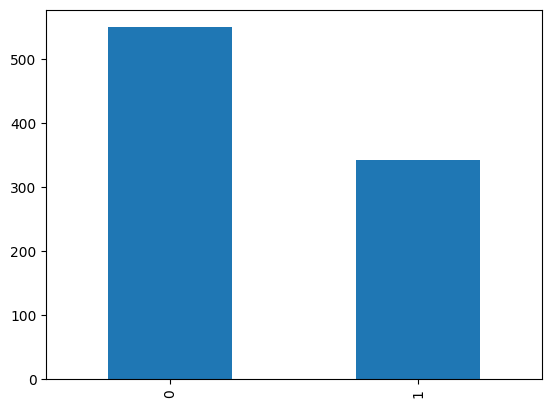

In [ ]:
y.value_counts().plot(kind='bar')
plt.show()

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
len(X_resampled)

1098

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

##AD: Parâmetros Padrão

In [ ]:
ad = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
ad.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = ad.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print("Matriz de Confusão:\n", confusion)
print("Relatório de Classificação:\n", report)


Acurácia: 0.8318181818181818
Matriz de Confusão:
 [[ 76  27]
 [ 10 107]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80       103
           1       0.80      0.91      0.85       117

    accuracy                           0.83       220
   macro avg       0.84      0.83      0.83       220
weighted avg       0.84      0.83      0.83       220



In [ ]:
dot_data = export_graphviz(ad, out_file=None, feature_names=X.columns, class_names=str(y.unique()), filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("arvore_de_decisao")

'arvore_de_decisao.pdf'

In [ ]:
accuracy = []
for i in range(5):
  ad = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
  ad.fit(X_train, y_train)
  y_pred = ad.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
np.mean(accuracy)

0.8272727272727272

##Otimização de Hiperparâmetros

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'class_weight': [None, 'balanced']
}

decision_tree =  DecisionTreeClassifier(random_state=42, class_weight='balanced')

scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(estimator= decision_tree, param_grid=param_grid, cv=5, scoring=scorer)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, pos_label=1))

In [ ]:
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor pontuação de validação cruzada:", grid_search.best_score_)

Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Melhor pontuação de validação cruzada: 0.8318301168228558


In [ ]:
melhor_modelo = grid_search.best_estimator_
melhor_modelo.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', random_state=42)

Acurácia: 0.8272727272727273
F1 Score no conjunto de teste: 0.8467741935483871


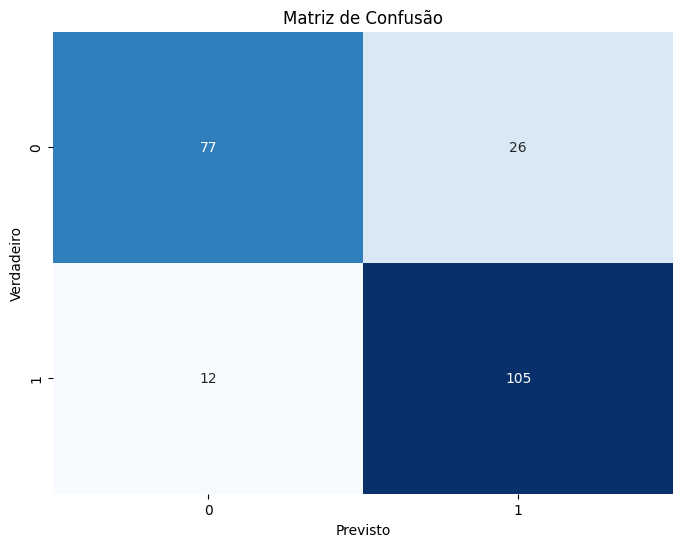

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       103
           1       0.80      0.90      0.85       117

    accuracy                           0.83       220
   macro avg       0.83      0.82      0.82       220
weighted avg       0.83      0.83      0.83       220



In [ ]:
y_pred = melhor_modelo.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)


print(f"Acurácia: {accuracy}")
print("F1 Score no conjunto de teste:", f1)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()
print("Relatório de Classificação:\n", report)

In [ ]:
dot_data = export_graphviz(melhor_modelo, out_file=None, feature_names=X.columns, class_names=str(y.unique()), filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("arvore_de_decisao_otimizada")  # Salva a árvore em um arquivo

'arvore_de_decisao_otimizada.pdf'

In [ ]:
accuracy = []
for i in range(5):
  melhor_modelo = DecisionTreeClassifier(**grid_search.best_estimator_.get_params())
  melhor_modelo.set_params(random_state=None)
  melhor_modelo.fit(X_train, y_train)
  y_pred = melhor_modelo.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
np.mean(accuracy)

0.8281818181818181

In [ ]:
accuracy = []
for i in range(5):
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred))
np.mean(accuracy)

0.8681818181818182

##Salvar como PDF


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/ProjetoAD.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ProjetoAD.ipynb to PDF
[NbConvertApp] Support files will be in ProjetoAD_files/
[NbConvertApp] Making directory ./ProjetoAD_files
[NbConvertApp] Writing 58413 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 62002 bytes to /content/drive/MyDrive/Colab Notebooks/ProjetoAD.pdf
